In [75]:
!pip install scikit-learn

In [76]:
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings

In [77]:
data = pd.read_csv('./CC Data 2.csv')
data

,Customer Age,Gender,Education Level,Marital Status,Months on book,Credit Limit,Total Trans Amt,Total Trans Count,Minimum income,Max income
0,45,M,High School,Married,39,12691,1144,42,60000,80000
1,49,F,Graduate,Single,44,8256,1291,33,0,40000
2,51,M,Graduate,Married,36,3418,1887,20,80000,120000
3,40,F,High School,Unknown,34,3313,1171,20,0,40000
4,40,M,Uneducated,Married,21,4716,816,28,60000,80000
...,...,...,...,...,...,...,...,...,...,...
10122,50,M,Graduate,Single,40,4003,15476,117,40000,60000
10123,41,M,Unknown,Divorced,25,4277,8764,69,40000,60000
10124,44,F,High School,Married,36,5409,10291,60,0,40000
10125,30,M,Graduate,Unknown,36,5281,8395,62,40000,60000


In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Education Level', 'Marital Status']

for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

data

,Customer Age,Gender,Education Level,Marital Status,Months on book,Credit Limit,Total Trans Amt,Total Trans Count,Minimum income,Max income
0,45,1,3,1,39,12691,1144,42,60000,80000
1,49,0,2,2,44,8256,1291,33,0,40000
2,51,1,2,1,36,3418,1887,20,80000,120000
3,40,0,3,3,34,3313,1171,20,0,40000
4,40,1,5,1,21,4716,816,28,60000,80000
...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,40,4003,15476,117,40000,60000
10123,41,1,6,0,25,4277,8764,69,40000,60000
10124,44,0,3,1,36,5409,10291,60,0,40000
10125,30,1,2,3,36,5281,8395,62,40000,60000


In [79]:
data.shape

(10127, 10)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Customer Age       10127 non-null  int64
 1   Gender             10127 non-null  int32
 2   Education Level    10127 non-null  int32
 3   Marital Status     10127 non-null  int32
 4   Months on book     10127 non-null  int64
 5   Credit Limit       10127 non-null  int64
 6   Total Trans Amt    10127 non-null  int64
 7   Total Trans Count  10127 non-null  int64
 8   Minimum income     10127 non-null  int64
 9   Max income         10127 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 672.6 KB


In [81]:
# Functions for EDA
def remove_duplicates(df):
    if(any(df.duplicated())):
        return df.drop_duplicates(keep='first')
    
    print('No duplicates')
    return df

def count_nulls(df):
    # Count the number of rows with null values
    num_rows_with_nulls = df.isnull().any(axis=1).sum()
    
    # Count the number of null values in each column
    null_counts = df.isnull().sum()
    
    return (num_rows_with_nulls, null_counts)


def plot_correlation(df, column):
    # Drop rows with missing values in the specified column
    df = df.dropna(subset=[column])
    
    # Calculate the correlation coefficients
    corr = df.corr()[[column]]
    
    # Create a bar plot
    ax = sns.barplot(data=corr, x=column, y=corr.index, orient='h')
    ax.set_title(f'Correlation between {column} and other columns')
    
    # Show the plot
    plt.show()

In [82]:
# Check for duplicates and null values in columns
data = remove_duplicates(df=data)
count_nulls(data)

No duplicates


(0,
 Customer Age         0
 Gender               0
 Education Level      0
 Marital Status       0
 Months on book       0
 Credit Limit         0
 Total Trans Amt      0
 Total Trans Count    0
 Minimum income       0
 Max income           0
 dtype: int64)

In [83]:
# Retrieve the rows will null value in their columns.
# The easy way out will be to remove those rows but we will look at how we can fill in the missing values.
null_rows = data[data.isnull().any(axis=1)]
null_rows.head(5)
mapdata = data
mapdata

,Customer Age,Gender,Education Level,Marital Status,Months on book,Credit Limit,Total Trans Amt,Total Trans Count,Minimum income,Max income
0,45,1,3,1,39,12691,1144,42,60000,80000
1,49,0,2,2,44,8256,1291,33,0,40000
2,51,1,2,1,36,3418,1887,20,80000,120000
3,40,0,3,3,34,3313,1171,20,0,40000
4,40,1,5,1,21,4716,816,28,60000,80000
...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,40,4003,15476,117,40000,60000
10123,41,1,6,0,25,4277,8764,69,40000,60000
10124,44,0,3,1,36,5409,10291,60,0,40000
10125,30,1,2,3,36,5281,8395,62,40000,60000


In [84]:
def find_outliers(df):
    outliers = {}
    fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 5*len(df.columns)))
    
    # Loop through each column in the DataFrame
    for i, col in enumerate(df.columns):
        # Check if the column is numeric
        if df[col].dtype in ["int64", "float64"]:
            # Calculate the IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Calculate the lower and upper bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find the outlier indices
            outlier_indexes = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
            
            # Add the outlier information to the dictionary
            outliers[col] = {
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_indexes': outlier_indexes,
                'outlier_values': df.loc[outlier_indexes, col].tolist()
            }
            
            # Plot the boxplot
            axs[i].boxplot(df[col], vert=False)
            axs[i].set_title(col)
    
    plt.show()
    return outliers

In [31]:
def min_max_scale(df):
   
    scaler = MinMaxScaler()
    
    # Fit the scaler to the data
    scaler.fit(df)
    
    # Transform the data
    scaled_data = scaler.transform(df)
    
    
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

def standard_scale(df):
   
    scaler = StandardScaler()
    
    # Fit the scaler to the data
    scaler.fit(df)
    
    # Transform the data
    scaled_data = scaler.transform(df)
    
    
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.
    
    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.
        
    Returns
    =======
    None 
    Prints a figure.
    
    """
    
    # Checking of input parameters omitted for this notebook 
    
    labels = sorted(pd.Series(labels_all).unique())
    
    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()
        
    else:
        
        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()
        

def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")

In [40]:
standard_scaled_data = standard_scale(data)
data = standard_scaled_data

In [41]:
import random
import time
fixed_random_state = random.seed(42)

In [43]:
affprop = AffinityPropagation(random_state=fixed_random_state).fit(data)

convergence_check(affprop)

Algorithm converged successfully!
n_iter: 47, max_iter: 200



In [44]:
cluster_centers_indices = affprop.cluster_centers_indices_
labels = affprop.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

from sklearn import metrics

def evaluate_clustering(labels, data):
# Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index


affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)



Estimated number of clusters: 340
Affinity Propagation Silhouette score: 0.143
Affinity Propagation Davies-Bouldin Index: 1.508
Affinity Propagation Calinski-Harabasz Index: 209.317


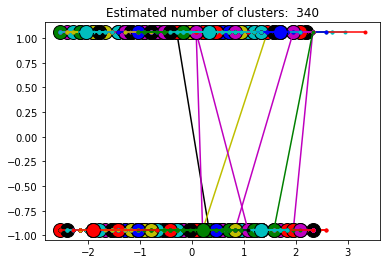

In [45]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data.to_numpy()[cluster_centers_indices[k]]
    plt.plot(data.to_numpy()[class_members, 0], data.to_numpy()[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in data.to_numpy()[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [46]:
# Count the number of members in each cluster
unique_labels, cluster_counts = np.unique(labels, return_counts=True)

# Print the results
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} members")


Cluster 0: 34 members
Cluster 1: 32 members
Cluster 2: 57 members
Cluster 3: 24 members
Cluster 4: 44 members
Cluster 5: 30 members
Cluster 6: 19 members
Cluster 7: 17 members
Cluster 8: 17 members
Cluster 9: 27 members
Cluster 10: 26 members
Cluster 11: 42 members
Cluster 12: 30 members
Cluster 13: 16 members
Cluster 14: 23 members
Cluster 15: 17 members
Cluster 16: 19 members
Cluster 17: 14 members
Cluster 18: 36 members
Cluster 19: 37 members
Cluster 20: 39 members
Cluster 21: 23 members
Cluster 22: 29 members
Cluster 23: 17 members
Cluster 24: 27 members
Cluster 25: 7 members
Cluster 26: 36 members
Cluster 27: 36 members
Cluster 28: 25 members
Cluster 29: 17 members
Cluster 30: 19 members
Cluster 31: 19 members
Cluster 32: 18 members
Cluster 33: 33 members
Cluster 34: 22 members
Cluster 35: 15 members
Cluster 36: 19 members
Cluster 37: 51 members
Cluster 38: 27 members
Cluster 39: 26 members
Cluster 40: 31 members
Cluster 41: 24 members
Cluster 42: 18 members
Cluster 43: 37 members

In [47]:
# Print the minimum, maximum, and variance in cluster size
min_cluster_size = np.min(cluster_counts)
max_cluster_size = np.max(cluster_counts)
variance_cluster_size = np.var(cluster_counts)
avg_cluster_size = np.mean(cluster_counts)

print(f"Minimum cluster size: {min_cluster_size}")
print(f"Maximum cluster size: {max_cluster_size}")
print(f"Variance in cluster size: {variance_cluster_size}")
print(f"Average in cluster size: {avg_cluster_size}")

Minimum cluster size: 4
Maximum cluster size: 97
Variance in cluster size: 211.21566608996542
Average in cluster size: 29.78529411764706


In [48]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(data.columns))
covar_matrix.fit(data)

PCA(n_components=10)

In [49]:
PCAmoduse = PCA(n_components=2)
data_new = PCAmoduse.fit_transform(data)

data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,3)])
data_new
data_numpy = data_new.to_numpy()
data_numpy

array([[ 1.28276035, -1.21610395],
       [-1.33380438, -1.71677585],
       [ 1.79677723, -1.94768917],
       ...,
       [-1.3844761 ,  0.92700785],
       [ 0.45159504,  1.57339342],
       [-1.20785   ,  1.64311177]])

Preference value = -1000.000000 :
Affinity Propagation Silhouette score: 0.557
Algorithm converged successfully!
n_iter: 86, max_iter: 500

Estimated number of clusters: 7
Preference value = -6000.000000 :
Affinity Propagation Silhouette score: 0.538
Algorithm converged successfully!
n_iter: 87, max_iter: 500

Estimated number of clusters: 3
Preference value = -11000.000000 :
Affinity Propagation Silhouette score: 0.648
Algorithm converged successfully!
n_iter: 136, max_iter: 500

Estimated number of clusters: 2
Preference value = -16000.000000 :
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Preference value = -21000.000000 :
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Preference value = -26000.000000 :
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


,preference,clusters,sil_score
2,-11000.0,2.0,0.647702
0,-1000.0,7.0,0.556820
1,-6000.0,3.0,0.538196
3,-16000.0,1.0,NaN
4,-21000.0,1.0,NaN


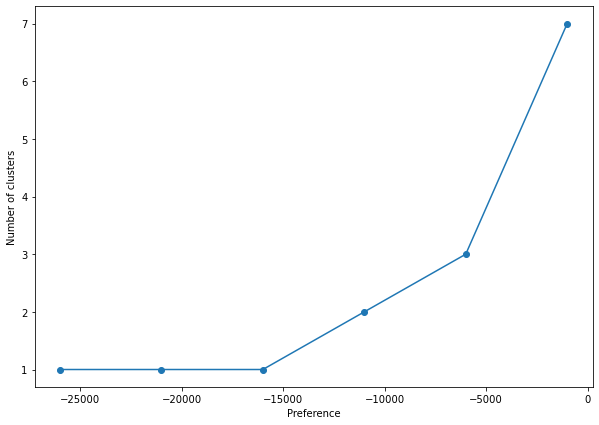

In [51]:
from sklearn.metrics import silhouette_score

preferences = np.arange(-1000,-30000,-5000)
clusters = []
af_sil_score = [] # silouette scores
##https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap

for p in preferences:
    try:
        print("Preference value = %f :" % p)
        af = AffinityPropagation(preference=p, damping=0.95, max_iter=500, random_state=fixed_random_state).fit(data_numpy)
        labels_af = pd.DataFrame(af.labels_)
        clusters.append(len(af.cluster_centers_indices_))
        silhouette_score = metrics.silhouette_score(data_numpy, af.labels_, metric='sqeuclidean')
        print("Affinity Propagation Silhouette score: %0.3f" %  silhouette_score)
        af_sil_score.append(silhouette_score)
        convergence_check(af)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters_ = len(cluster_centers_indices)
        print("Estimated number of clusters: %d" % n_clusters_)
        
    except ValueError as e:
            # Handle the ValueError exception
            print("ValueError:", e)
            
        

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')


af_results = pd.DataFrame([preferences, clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

In [53]:
af = AffinityPropagation(preference=-11000, damping=0.95, max_iter=500, random_state=fixed_random_state).fit(data_numpy)

In [54]:
print(af.cluster_centers_indices_)
print(len(cluster_centers_indices))

[2038 3866]
2


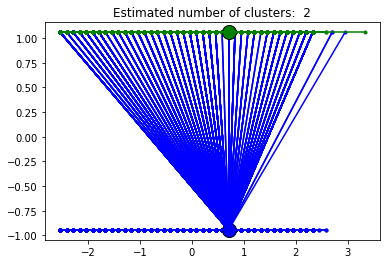

In [55]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data.to_numpy()[cluster_centers_indices[k]]
    plt.plot(data.to_numpy()[class_members, 0], data.to_numpy()[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in data.to_numpy()[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [56]:
def evaluate_clustering(labels, data):
    # Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index


affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)

Affinity Propagation Silhouette score: 0.245
Affinity Propagation Davies-Bouldin Index: 1.663
Affinity Propagation Calinski-Harabasz Index: 3254.761


In [57]:
# Count the number of members in each cluster
unique_labels, cluster_counts = np.unique(labels, return_counts=True)

# Print the results
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} members")


Cluster 0: 5990 members
Cluster 1: 4137 members


In [58]:
unique_labels

array([0, 1], dtype=int64)

In [85]:
import numpy as np

# Assuming 'data' is your dataset
for label in unique_labels:
    cluster_data = mapdata[labels == label]
    mean_features = np.mean(cluster_data, axis=0)
    std_features = np.std(cluster_data, axis=0)
    print(f"Cluster {label}: {cluster_counts[label]} members")
    print(f"Mean Features: {mean_features}")

Cluster 0: 5990 members
Mean Features: Customer Age            46.192154
Gender                   0.105509
Education Level          3.088147
Marital Status           1.465275
Months on book          35.763272
Credit Limit          4841.100000
Total Trans Amt       4302.884808
Total Trans Count       65.941903
Minimum income        8794.657763
Max income           36971.619366
dtype: float64
Cluster 1: 4137 members
Mean Features: Customer Age            46.519700
Gender                   1.000000
Education Level          3.108774
Marital Status           1.460720
Months on book          36.167513
Credit Limit         13944.497945
Total Trans Amt       4550.616872
Total Trans Count       63.290307
Minimum income       75678.027556
Max income           99584.239787
dtype: float64
